<h1>Apple Stock Analysis and Trading Test</h1>

In [9]:
import quandl
import pandas as pd

aapl = quandl.get("WIKI/AAPL", start_date="2006-10-01", end_date="2012-01-01")

In [10]:
# Return first rows of `aapl`
aapl.head()

# Return last rows of `aapl`
aapl.tail()

# Describe `aapl`
aapl.describe()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
count,1323.000000,1323.000000,1323.000000,1323.000000,1.323000e+03,1323.0,1323.0,1323.000000,1323.000000,1323.000000,1323.000000,1.323000e+03
mean,202.303670,204.674047,199.552209,202.224393,2.689852e+07,0.0,1.0,25.998841,26.303468,25.645240,25.988653,1.882896e+08
std,98.862163,99.387200,98.208529,98.837774,1.467152e+07,0.0,0.0,12.705166,12.772640,12.621165,12.702032,1.027007e+08
min,73.420000,73.980000,72.600000,73.230000,5.624800e+06,0.0,1.0,9.435493,9.507461,9.330112,9.411076,3.937360e+07
25%,122.205000,124.270000,120.275000,122.020000,1.602910e+07,0.0,1.0,15.705046,15.970427,15.457014,15.681271,1.122037e+08
50%,176.260000,179.500000,173.080000,175.840000,2.328380e+07,0.0,1.0,22.651867,23.068252,22.243192,22.597891,1.629866e+08
75%,271.440000,273.927500,268.460000,270.900000,3.308900e+07,0.0,1.0,34.883823,35.203502,34.500852,34.814426,2.316230e+08
max,421.760000,426.700000,415.990000,422.240000,1.204632e+08,0.0,1.0,54.202038,54.836897,53.460513,54.263725,8.432424e+08


<p>The open column describes the opening price of the stock, the low column is the closing price, high and low describe the highest and lowest values of the stock in a given day. Volume describes how much of stock was traded in a day.</p>

In [11]:
# Inspect the index 
aapl.index

# Inspect the columns
aapl.columns

# Select only the last 10 observations of `Close`
ts = aapl['Close'][-10:]

# Check the type of `ts` 
type(ts)

pandas.core.series.Series

In [12]:
# Inspect the first rows of November-December 2006
print(aapl.loc[pd.Timestamp('2006-11-01'):pd.Timestamp('2006-12-31')].head())

# Inspect the first rows of 2007 
print(aapl.loc['2007'].head())

# Inspect November 2006
print(aapl.iloc[22:43])

# Inspect the 'Open' and 'Close' values at 2006-11-01 and 2006-12-01
print(aapl.iloc[[22,43], [0, 3]])

              Open   High    Low  Close      Volume  Ex-Dividend  Split Ratio  \
Date                                                                            
2006-11-01  81.100  81.38  78.36  79.16  21828300.0          0.0          1.0   
2006-11-02  78.915  79.32  78.50  78.98  16624400.0          0.0          1.0   
2006-11-03  79.360  79.53  77.79  78.29  15424600.0          0.0          1.0   
2006-11-06  78.950  80.06  78.43  79.71  15520600.0          0.0          1.0   
2006-11-07  80.450  81.00  80.13  80.51  18783300.0          0.0          1.0   

            Adj. Open  Adj. High   Adj. Low  Adj. Close  Adj. Volume  
Date                                                                  
2006-11-01  10.422480  10.458464  10.070352   10.173163  152798100.0  
2006-11-02  10.141677  10.193726  10.088344   10.150031  116370800.0  
2006-11-03  10.198866  10.220713   9.997099   10.061356  107972200.0  
2006-11-06  10.146175  10.288826  10.079348   10.243846  108644200.0  
2006-1

In [13]:
# Sample 20 rows
sample = aapl.sample(20)

# Print `sample`
print(sample)

# Resample to monthly level 
monthly_aapl = aapl.resample('M').mean()

# Print `monthly_aapl`
print(monthly_aapl)

               Open      High      Low    Close      Volume  Ex-Dividend  \
Date                                                                       
2010-04-05  234.975  238.5100  234.770  238.490  24446700.0          0.0   
2010-08-04  262.840  264.2800  260.311  262.980  15013400.0          0.0   
2010-01-19  208.330  215.1900  207.240  215.040  26071700.0          0.0   
2009-06-09  143.810  144.5600  140.550  142.720  24177300.0          0.0   
2007-03-23   93.350   94.0700   93.300   93.520  16103000.0          0.0   
2011-11-21  370.400  371.6800  365.910  369.010  15999300.0          0.0   
2008-11-07   99.240   99.8500   95.720   98.240  39116200.0          0.0   
2007-05-15  109.570  110.2000  106.480  107.520  34089800.0          0.0   
2010-09-14  266.210  269.1700  265.520  268.060  14576800.0          0.0   
2011-07-15  361.170  365.0000  359.170  364.920  17302400.0          0.0   
2008-08-15  179.040  179.7500  175.050  175.740  25294700.0          0.0   
2011-02-08  

In [14]:
# Add a column `diff` to `aapl` 
aapl['diff'] = aapl.Open - aapl.Close

"""
The diff column is used to describe the difference between the opening price and the closing price of the stock. This
indicates if there was a positive or negative trend in a given day for the stock.
"""

# Get first few rows of `aapl` to see new column
aapl.head()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume,diff
Date,,,,,,,,,,,,,
2006-10-02,75.10,75.870,74.30,74.86,25451400.0,0.0,1.0,9.651397,9.750352,9.548586,9.620553,178159800.0,0.24
2006-10-03,74.45,74.950,73.19,74.07,28239600.0,0.0,1.0,9.567863,9.632120,9.405935,9.519027,197677200.0,0.38
2006-10-04,74.10,75.462,73.16,75.38,29610100.0,0.0,1.0,9.522883,9.697919,9.402080,9.687381,207270700.0,-1.28
2006-10-05,74.53,76.160,74.13,74.83,24424400.0,0.0,1.0,9.578144,9.787621,9.526738,9.616698,170970800.0,-0.30
2006-10-06,74.42,75.040,73.81,74.22,16677100.0,0.0,1.0,9.564007,9.643686,9.485614,9.538304,116739700.0,0.20


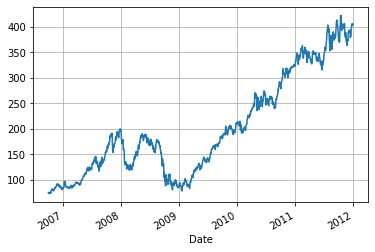

In [9]:
# Import Matplotlib's `pyplot` module as `plt`
import matplotlib.pyplot as plt

# Plot the closing prices for `aapl`
aapl['Close'].plot(grid=True)

# Show the plot
plt.show()